# Phase 0 Importing Data

In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset and load the datset
df = pd.read_csv('/content/dataset.csv')
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [ ]:
#Here we check the how many Rows And Columns are there in the dataset
df.shape

(1190, 12)

In [ ]:
#Here we check the columns name
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
#Here we check the Quick Summary Of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
#Here we check the Stastitical Summary of the Dataset
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
#Here we check the Duplicate values in the Dataset
df.duplicated().sum()

np.int64(272)

In [ ]:
#Drop the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Here we chech the null values in the dataset
#There is no null values ithe datasets
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


# Phase1 Exploratory Data Analysis[EDA]

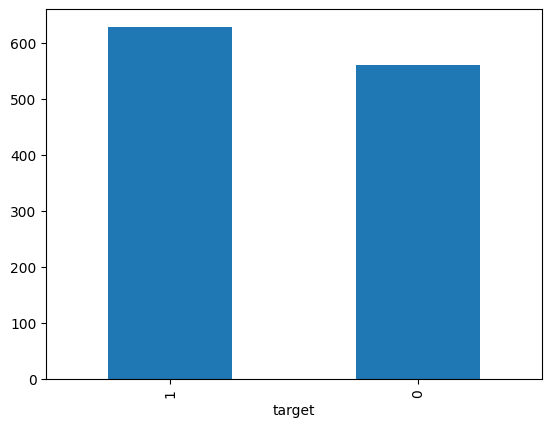

In [ ]:
df["target"].value_counts().plot(kind="bar")
plt.tick_params(labelsize=10)
plt.show()

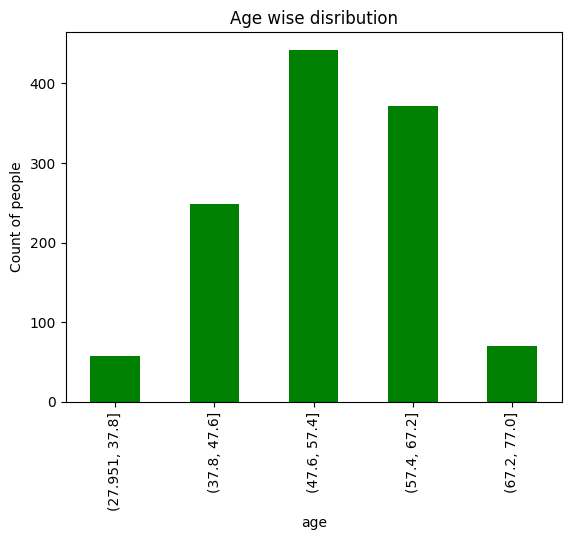

In [ ]:
df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="bar")
df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="bar", color='Green')
plt.tick_params(labelsize=10)
plt.title("Age wise disribution")
plt.ylabel("Count of people")
plt.show()

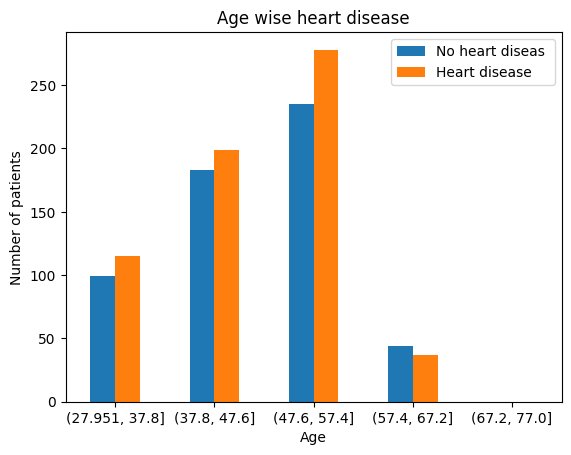

In [ ]:
pd.crosstab(df.age, df.target).groupby(pd.cut(df.age, 5)).sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.legend(["No heart diseas ", "Heart disease"])
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Age wise heart disease")
plt.show()

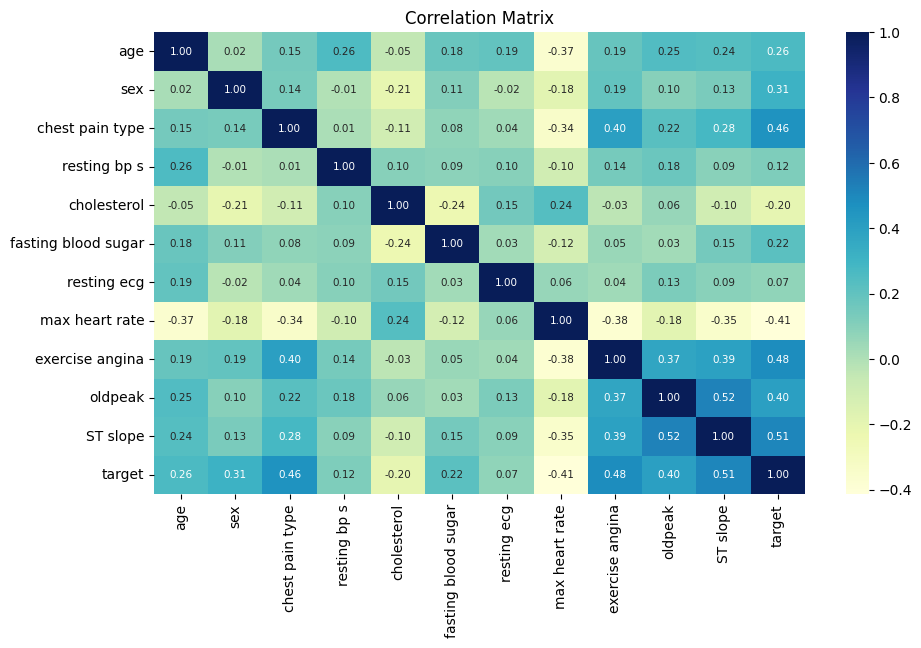

In [ ]:
fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

# Phase 2
# Modeling

 By using this data available to use let's build a model to solve our problem i.e to check where or not the patient has Heart Disease

In [ ]:
#Here we do feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217,0
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583,1
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217,0
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583,1
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217,0


In [ ]:
#Getting features and target data ready for user
X = df.drop('target', axis=1) # feature data (Independent Dataset)
y = df['target'] # Target Data (dependent Data)


In [ ]:
# Here we spilt the data set as we can see the we divide the 80% of dataset for trainig and 20% of dataset fot testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(952, 238)

On the basis of data available and Nature of our Problem (being a Classification Problem), we will be trying these 3 Classifiers  
  
1. Logistic Regresion
2. K-Nearest Neighbour
3. Random Forest Classifier

In [ ]:
# Importing these Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

model_dict = {"Logistic_Regression" : LogisticRegression(),
              "KNN_Classifier" : KNeighborsClassifier(),
              "Random_Forest" : RandomForestClassifier()}

def model_fit_and_score(model_dict, X, y, test_size=0.20):
    """
    Splitting X and Y Data in Train and Test Data,
    Then Fitting the train data to the model.
    And Checking the score for the Created Model.

    model_dict = Model Dictionery (Dictionery of Model we have selected)
    X = Feature Labels
    y = Target Data
    test_size = Test Split Size to split data in Test and Train sets
                Default = 0.20
    """

    model_score={} # Dictionary to append Scores of fitted model

    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    for name, model in model_dict.items():
        # Fit Model
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    scores = pd.DataFrame(model_score, index=["Score"])
    scores.T.plot(kind="bar")
    plt.title("Scores of these Models")
    plt.xticks(rotation=0)
    plt.xlabel("Model Name")
    plt.ylabel("Score of Model")
    return scores

,Logistic_Regression,KNN_Classifier,Random_Forest
Score,0.843575,0.888268,0.949721


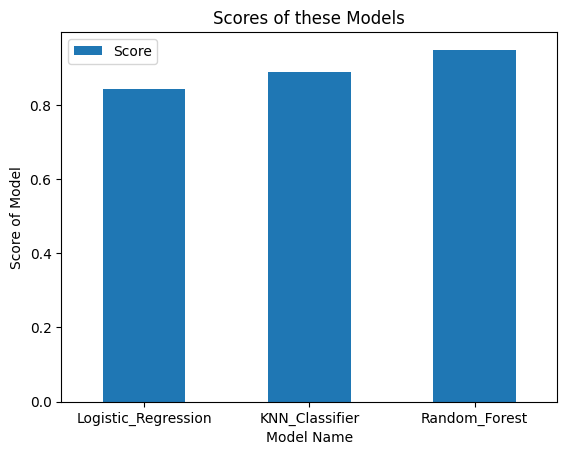

In [ ]:
model_fit_and_score(model_dict, X, y, test_size=0.15)

In [ ]:
def model_cross_val_score(model_dict, X, y, cv=5):
    """
    Cross Validation for Models in Model Dict...
    Providing Mean value of cross validation for each Parameter

    Parameter Includes : accuracy, precision, recall, f1_micro, f1_macro

    model_dict : Model Dictionery with/without parameter tuning
    X : Feature Data
    y : Target Data
    cv : Cross Validation folds (Default = 5)
    """
    warnings.filterwarnings("ignore")

    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]

    cv_score = {} # To append Scores of each Model


    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score
    cv = pd.DataFrame(data=cv_score)
    return cv

In [ ]:
model_cross_val_score(model_dict, X, y, cv=5)

,Logistic_Regression,KNN_Classifier,Random_Forest
accuracy,0.815126,0.843697,0.931933
precision,0.833012,0.864736,0.933148
recall,0.820292,0.837765,0.944241
f1_micro,0.815126,0.843697,0.921008
f1_macro,0.813784,0.843057,0.932231


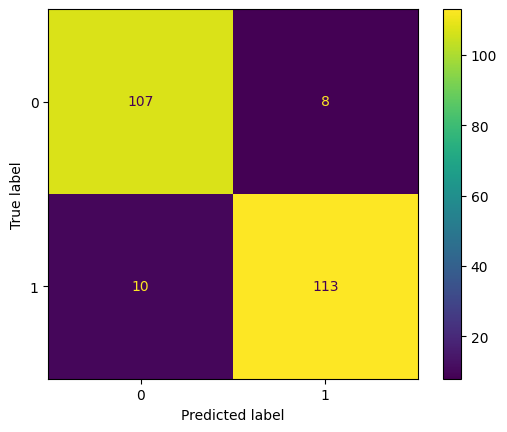

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#model = LogisticRegression()
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(con_mat)
ax = display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


def plot_roc_curve(X, y, model):
    """
    Custom Function to get ROC curve plotted whenever we needed in this file (For Ease of use)

    """
    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)

    y_pred_positive = y_pred_prob[:,1]

    fpr, tpr, threshold = roc_curve(y_test, y_pred_positive)
    roc_score = roc_auc_score(y_test, y_pred_positive)

    fig, ax = plt.subplots(figsize=(5,5))

    fig.suptitle(f"AREA Under ROC Curve:{model}", fontsize=15, color="darkblue")

    ax.plot(fpr, tpr, color="darkgreen", label="ROC")

    ax.plot([0,1], [0,1], color="darkblue", linestyle="dotted", label="Base-line")

    ax.set(title="Receiver Operating Characteristics (ROC)")
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")

    ax.fill_between(fpr, tpr, 0, color="lightgrey")

    ax.text(0.55, 0.45, f"{roc_score*100:.2f}%", color="darkgreen")

    fig.legend(loc="right", )
    plt.show()


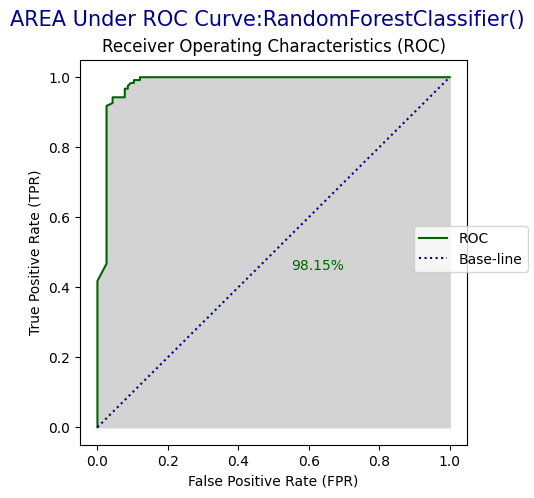

In [ ]:
plot_roc_curve(X, y, RandomForestClassifier())

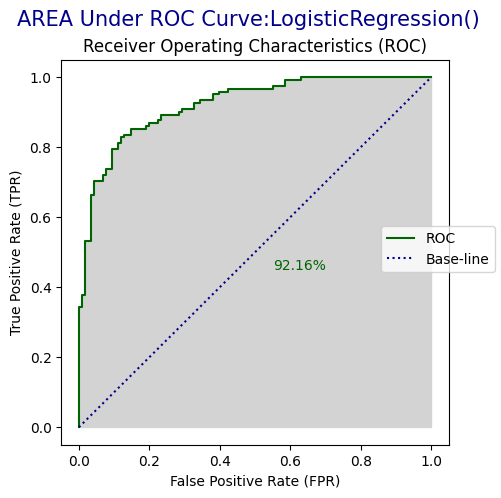

In [ ]:
plot_roc_curve(X, y, LogisticRegression())

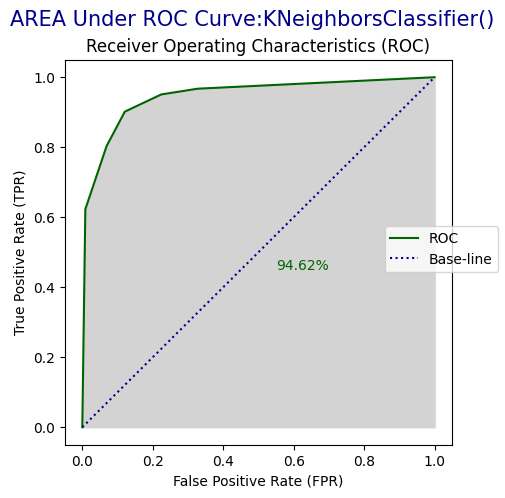

In [ ]:
plot_roc_curve(X, y, KNeighborsClassifier())

# Phase 3 Hyperparameter Tunning
 So we get score of  almost 1 in RandomForestClassifier, Lets put it aside and try to increase score of KNN and LogisticRegression Model

#### Hyper Parameter tuning for LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setting Grid for Logistic Regression Parameters  for GridSearchCV
lr_grid = {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
           "penalty" : ["none", "l1", "l2", "elasticnet"],
           "C" : np.logspace(-4, 4, 30)}

# Instantiate Grid Search CV
gs_log_reg_model = GridSearchCV(LogisticRegression(),
                                param_grid=lr_grid,
                                cv=5,
                                verbose=2)

# Fit Grid Search CV our Data
gs_log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [ ]:
gs_log_reg_model.best_score_, gs_log_reg_model.best_estimator_

(np.float64(0.8340259024524661),
 LogisticRegression(C=np.float64(0.03039195382313198), penalty='l1',
                    solver='liblinear'))

In [ ]:
model_cross_val_score({"Grid_Search-Logistic Regression" : LogisticRegression(C=0.20433597178569418, solver='liblinear'),
                       "Logistic Regresion - Base Model" : LogisticRegression()},
                      X, y, cv=5)

,Grid_Search-Logistic Regression,Logistic Regresion - Base Model
accuracy,0.815966,0.815126
precision,0.836024,0.833012
recall,0.818692,0.820292
f1_micro,0.815966,0.815126
f1_macro,0.814604,0.813784


In [ ]:
!pip install joblib

import joblib
#Setting Grid For KNN
knn_grid = {'n_neighbors': range(1,10, 1),
            'leaf_size': range(20,40,1),
            'p': (1,2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')}

# Instantiating GridSearch CV
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=3)

# Fitting Data in GridSearch CV Model
gs_knn.fit(X_train, y_train)

# Extract the best model from the GridSearchCV object
best_model = gs_knn.best_estimator_

# Save the best model using joblib
joblib.dump(best_model, 'model.joblib')

Streaming output truncated to the last 5000 lines.
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.864 total time=   0.0s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.853 total time=   0.0s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.868 total time=   0.0s
[CV 4/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.821 total time=   0.0s
[CV 5/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.816 total time=   0.0s
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.901 total time=   0.0s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.890 total time=   0.0s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.884 total time=   0.0s
[CV 4/5] END leaf_size=26, metric=

['model.joblib']

In [ ]:
gs_knn.best_score_, gs_knn.best_params_

(np.float64(0.9085918985946542),
 {'leaf_size': 20,
  'metric': 'minkowski',
  'n_neighbors': 9,
  'p': 1,
  'weights': 'distance'})

In [ ]:
model_cross_val_score({"Grid_Search-KNN" : KNeighborsClassifier(leaf_size=20,
                                                                metric='chebyshev',
                                                                n_neighbors=7,
                                                                p=1,
                                                                weights='distance'),
                       "KNN - Base Model" : KNeighborsClassifier()},
                      X, y, cv=5)

,Grid_Search-KNN,KNN - Base Model
accuracy,0.900000,0.843697
precision,0.918750,0.864736
recall,0.890108,0.837765
f1_micro,0.900000,0.843697
f1_macro,0.899664,0.843057
